# Initialization

In [2]:
import numpy as np

# load training data
stored_images = np.load("data/binarized/train_images.npy")

In [22]:
num_neurons = 1024
num_patterns = 5

# randomly select from training set
idxs = np.random.choice(range(len(stored_images)), size=num_patterns, replace=False)
original = [stored_images[i] for i in idxs]
corrupted = [masked_images[i] for i in idxs]
retrieved = []

# Models

In [19]:
class HopfieldNet:
    def __init__(self, N):
        self.N = N
        self.W = np.zeros((N, N))
        self.state = np.random.choice([-1, 1], size=self.N)
    
    def train(self, patterns):
        patterns = np.array(patterns)
        for pattern in patterns:
            pattern = np.array(pattern).reshape(-1, 1)
            self.W += np.dot(pattern, pattern.T)
        
        np.fill_diagonal(self.W, 0)
        self.W /= self.N

    def init_state(self, pattern):
        self.state = pattern
    
    def forward(self, steps):
        for _ in range(steps):
            i = np.random.randint(0, self.N)
            self.state[i] = 1 if np.dot(self.W[i], self.state) >= 0 else -1  # Update neuron i
        return self.state

# Main

In [33]:
HN = HopfieldNet(num_neurons)
HN.train(original)

epochs = 10000
for img in corrupted:
    HN.init_state(img)
    out = HN.forward(epochs)
    retrieved.append(out)

# Plot

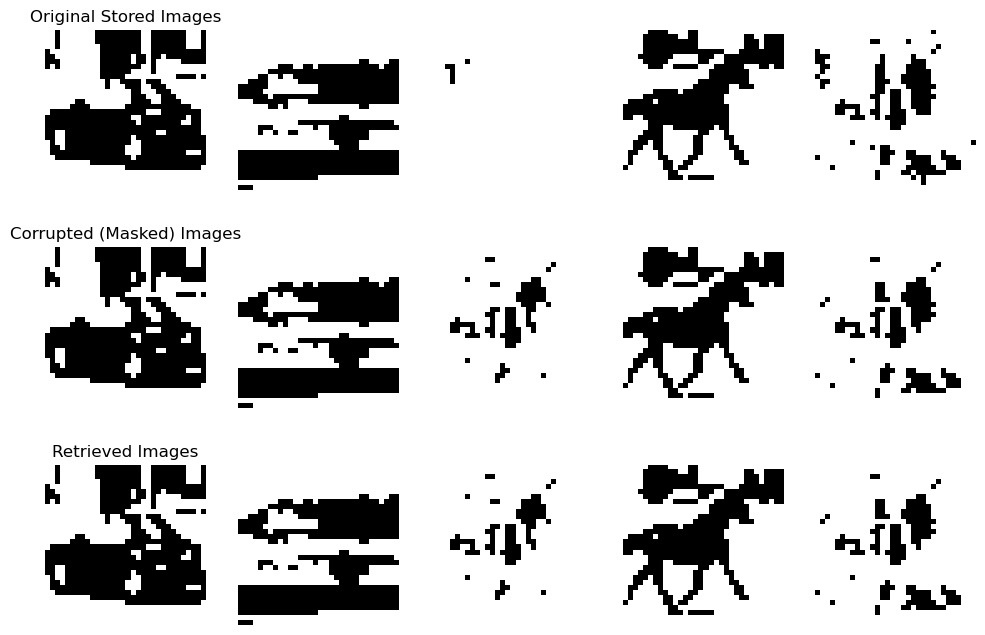

In [34]:
import matplotlib.pyplot as plt

def plot_comparisons(original, corrupted, retrieved, title_corrupted, title_retrieved, num_samples=5):

    fig, axes = plt.subplots(3, num_samples, figsize=(12, 8))

    for i in range(num_samples):
        # Original stored image
        axes[0, i].imshow(original[i].reshape(32, 32), cmap='gray')
        axes[0, i].axis('off')

        # Corrupted image
        axes[1, i].imshow(corrupted[i].reshape(32, 32), cmap='gray')
        axes[1, i].axis('off')

        # Retrieved image
        axes[2, i].imshow(retrieved[i].reshape(32, 32), cmap='gray')
        axes[2, i].axis('off')

    # Add row titles
    axes[0, 0].set_title("Original Stored Images", fontsize=12, loc='center')
    axes[1, 0].set_title(title_corrupted, fontsize=12, loc='center')
    axes[2, 0].set_title(title_retrieved, fontsize=12, loc='center')

    plt.show()

# Plot results for masked images
plot_comparisons(original, corrupted, retrieved, "Corrupted (Masked) Images", "Retrieved Images")

# Nuiances

In [63]:
def encode(name):
    char_map = {chr(i + ord('a')): format(i, '05b') for i in range(26)}
    binary_str = ''.join(char_map[ch] for ch in name)
    encoded_list = [1 if bit == '1' else -1 for bit in binary_str]
    padding_pattern = [1] * MAX_ENC
    required_length = MAX_LEN * MAX_ENC
    while len(encoded_list) < required_length:
        encoded_list.extend(padding_pattern[:min(len(padding_pattern), required_length - len(encoded_list))])
    return encoded_list[:MAX_LEN]

In [64]:
def decode(encoded_list):
    char_map = {chr(i + ord('a')): format(i, '05b') for i in range(26)}
    reverse_map = {v: k for k, v in char_map.items()}
    binary_str = ''.join('1' if bit == 1 else '0' for bit in encoded_list)
    decoded_name = ''.join(reverse_map[binary_str[i:i+MAX_ENC]] for i in range(0, len(binary_str), MAX_LEN) if binary_str[i:i+MAX_ENC] in reverse_map)
    return decoded_name

In [92]:
names = ["trump", "kathy", "agent", "baker", "terry"]
name_encode = [encode(name) for name in names]

HN = HopfieldNet(MAX_LEN * MAX_ENC)

HN.train(name_encode)

HN.init_state(encode("abcde"))
out = HN.forward(1000)

out_name = decode(out)
print(out_name)

iadhq
